In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [4]:
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.Series(housing.target, name='MedHouseValue')

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [7]:
y_pred = tree_reg.predict(X_test)

In [8]:
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio:", mse)
print("Puntuación del modelo en el conjunto de entrenamiento:", tree_reg.score(X_train, y_train))
print("Puntuación del modelo en el conjunto de prueba:", tree_reg.score(X_test, y_test))

Error cuadrático medio: 0.495235205629094
Puntuación del modelo en el conjunto de entrenamiento: 1.0
Puntuación del modelo en el conjunto de prueba: 0.622075845135081


In [13]:
california_housing = fetch_california_housing()
x = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
Y = pd.Series(california_housing.target, name='MedHouseValue')

In [14]:
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.2, random_state=42)

In [15]:
param_grid = {
    'max_depth': [5], 
    'min_samples_split': np.arange(2, 21)}

In [16]:
grid_search = GridSearchCV(tree_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [5],
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20])},
             scoring='neg_mean_squared_error')

In [17]:
best_tree_reg = grid_search.best_estimator_

In [18]:
y_pred = best_tree_reg.predict(X_test)

In [19]:
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio (Mejorado):", mse)
print("Mejores hiperparámetros encontrados:", grid_search.best_params_)

Error cuadrático medio (Mejorado): 0.5245146178314735
Mejores hiperparámetros encontrados: {'max_depth': 5, 'min_samples_split': 6}


In [20]:
import matplotlib.pyplot as plt

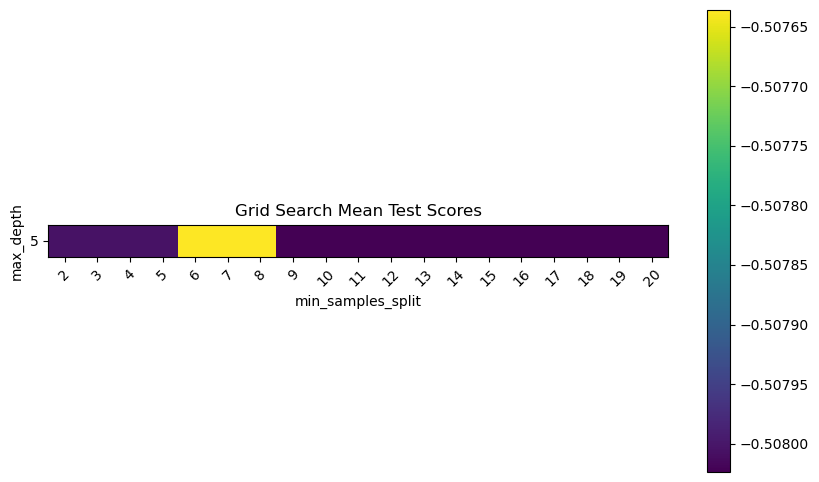

In [21]:
results = pd.DataFrame(grid_search.cv_results_)
scores = np.array(results.mean_test_score).reshape(1, len(param_grid['min_samples_split']))

plt.figure(figsize=(10, 6))
plt.imshow(scores, interpolation='nearest', cmap='viridis')
plt.title('Grid Search Mean Test Scores')
plt.xlabel('min_samples_split')
plt.ylabel('max_depth')
plt.colorbar()
plt.xticks(np.arange(len(param_grid['min_samples_split'])), param_grid['min_samples_split'], rotation=45)
plt.yticks([0], [param_grid['max_depth'][0]])
plt.show()